In [392]:
import pandas as pd
import numpy as np
from dateutil import parser
import datetime as dt
import time
import seaborn as sns
import matplotlib.pyplot as plt
import sys


In [127]:
brent_oil_prices = pd.read_csv('BrentOilPrices.csv')
brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'])
brent_oil_prices['Price'] = brent_oil_prices['Price'].astype(float)
type(brent_oil_prices['Price'].iloc[0])

numpy.float64

-------------------------------------------------------------------------------------------------------------------------------------
A few rough plots to check whether there's something extremely abnormal or not


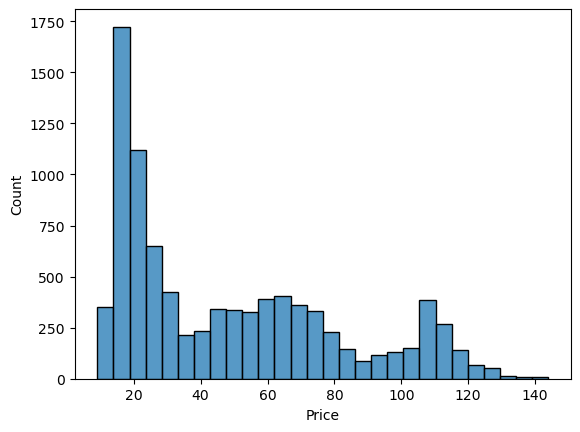

In [68]:
sns.histplot(brent_oil_prices['Price']);

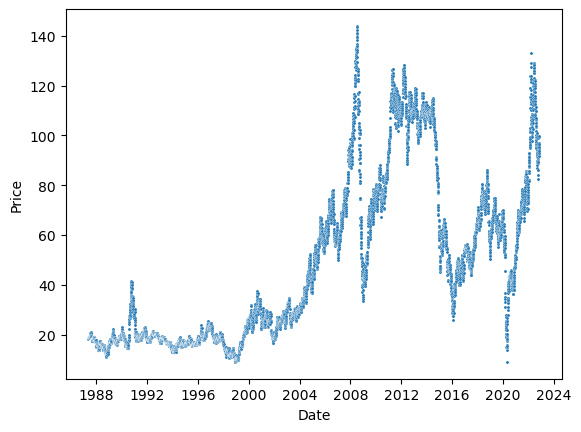

In [168]:
# plot brent oil prices
sns.scatterplot(data=brent_oil_prices, x='Date', y='Price', s= 5);
#plt.figure(figsize=(13,6))

In [160]:
per = brent_oil_prices.Date.dt.to_period("M")
g = brent_oil_prices.groupby(per)
medians = g.agg({'Price':np.median}).reset_index()
medians
#brent_oil_prices.groupby(brent_oil_prices['Date'].dt.year, brent_oil_prices['Date'].dt.month).agg({'Price':np.median})

,Date,Price
0,1987-05,18.600
1,1987-06,18.780
2,1987-07,19.830
3,1987-08,18.850
4,1987-09,18.415
...,...,...
422,2022-07,111.510
423,2022-08,99.680
424,2022-09,89.620
425,2022-10,93.300


In [151]:
missing = pd.date_range(start = '1987-05-20', end = '2022-11-14' ).difference(brent_oil_prices['Date'])
medians[medians['Date']==missing[0].strftime('%Y-%m')]['Price'].iloc[0]

18.6

In [161]:
# Impute missing dates with median of monthly price for brent oil 
filled = pd.DataFrame({"Date": np.array([]), "Price": np.array([])})
for date in missing:
    entry = medians[medians['Date']==date.strftime('%Y-%m')]
    if (len(entry) != 0):
        filled.loc[len(filled.index)] = np.array([date, entry['Price'].iloc[0]])
    else:
        # TODO: implement linear function imputation methodology if a(n) specific month has no data
        
filled

,Date,Price
0,1987-05-23,18.6
1,1987-05-24,18.6
2,1987-05-30,18.6
3,1987-05-31,18.6
4,1987-06-06,18.78
...,...,...
3947,2022-10-30,93.3
3948,2022-11-05,95.68
3949,2022-11-06,95.68
3950,2022-11-12,95.68


In [169]:
# combine imputed values with original dataset
brent_oil_prices = brent_oil_prices.append(filled)

/var/folders/_9/4y2qsq2s4z7409lj_26z3c6w0000gn/T/ipykernel_39771/4107727956.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brent_oil_prices = brent_oil_prices.append(filled)


In [247]:
brent_oil_prices = brent_oil_prices.sort_values('Date')
brent_oil_prices = brent_oil_prices.reset_index()[['Date', 'Price']]
brent_oil_prices

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.6
4,1987-05-24,18.6
...,...,...
12958,2022-11-10,94.25
12959,2022-11-11,96.37
12960,2022-11-12,95.68
12961,2022-11-13,95.68


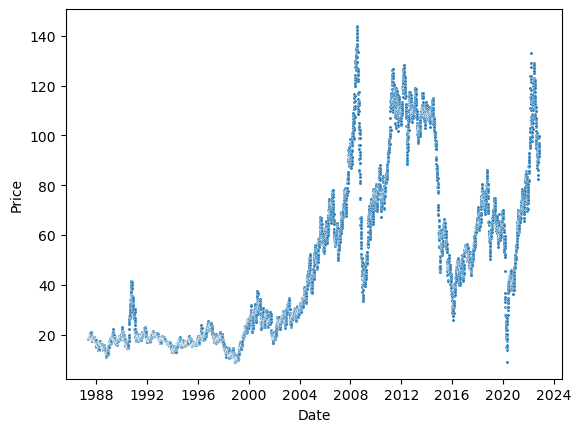

In [180]:
# plot brent oil prices with imputed values
sns.scatterplot(data=brent_oil_prices, x='Date', y='Price', s= 5);

***exxon stock data cleaning***

In [191]:
exxon_stock = pd.read_csv('ExxonStock.csv')
exxon_stock = exxon_stock[['Date', 'Adj Close']]
exxon_stock['Date'] = pd.to_datetime(exxon_stock['Date'])

some graphs to check for irregularities

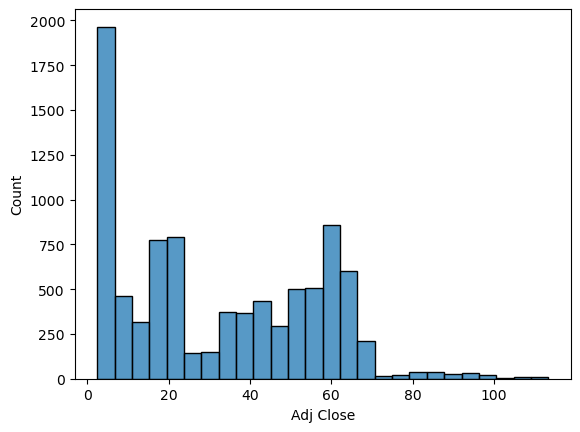

In [192]:
sns.histplot(exxon_stock['Adj Close']);

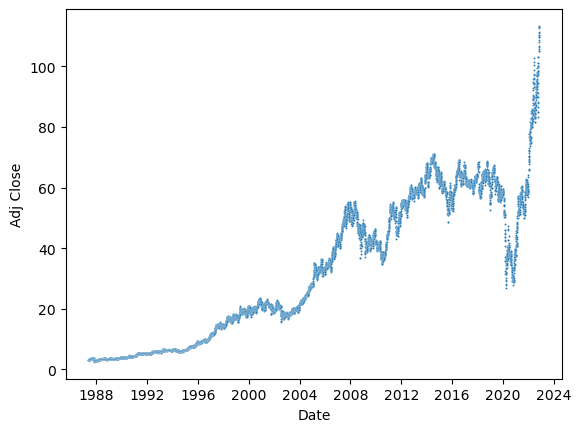

In [193]:
sns.scatterplot(data=exxon_stock, x='Date', y='Adj Close', s = 2);

In [194]:
per = exxon_stock.Date.dt.to_period("M")
g = exxon_stock.groupby(per)
medians = g.agg({'Adj Close':np.median}).reset_index()
medians

,Date,Adj Close
0,1987-05,3.196271
1,1987-06,3.271718
2,1987-07,3.434048
3,1987-08,3.617763
4,1987-09,3.580802
...,...,...
422,2022-07,85.071915
423,2022-08,92.823601
424,2022-09,92.465630
425,2022-10,101.056473


In [195]:
missing = pd.date_range(start = '1987-05-20', end = '2022-11-14' ).difference(exxon_stock['Date'])
missing

DatetimeIndex(['1987-05-23', '1987-05-24', '1987-05-25', '1987-05-30',
               '1987-05-31', '1987-06-06', '1987-06-07', '1987-06-13',
               '1987-06-14', '1987-06-20',
               ...
               '2022-10-15', '2022-10-16', '2022-10-22', '2022-10-23',
               '2022-10-29', '2022-10-30', '2022-11-05', '2022-11-06',
               '2022-11-12', '2022-11-13'],
              dtype='datetime64[ns]', length=4018, freq=None)

In [196]:
filled = pd.DataFrame({"Date": np.array([]), "Adj Close": np.array([])})
for date in missing:
    entry = medians[medians['Date']==date.strftime('%Y-%m')]
    if (len(entry) != 0):
        filled.loc[len(filled.index)] = np.array([date, entry['Adj Close'].iloc[0]])
    else:
        # TODO: implement linear function imputation methodology if a(n) specific month has no data
filled

,Date,Adj Close
0,1987-05-23,3.196271
1,1987-05-24,3.196271
2,1987-05-25,3.196271
3,1987-05-30,3.196271
4,1987-05-31,3.196271
...,...,...
4013,2022-10-30,101.056473
4014,2022-11-05,111.214695
4015,2022-11-06,111.214695
4016,2022-11-12,111.214695


In [199]:
exxon_stock = exxon_stock.append(filled)

/var/folders/_9/4y2qsq2s4z7409lj_26z3c6w0000gn/T/ipykernel_39771/3384774426.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exxon_stock = exxon_stock.append(filled)


In [246]:
exxon_stock = exxon_stock.sort_values('Date')
exxon_stock = exxon_stock.reset_index()[['Date', 'Adj Close']]
exxon_stock

,Date,Adj Close
0,1987-05-20,3.196271
1,1987-05-21,3.191697
2,1987-05-22,3.173407
3,1987-05-23,3.196271
4,1987-05-23,3.196271
...,...,...
16976,2022-11-12,111.214695
16977,2022-11-12,111.214695
16978,2022-11-13,111.214695
16979,2022-11-13,111.214695


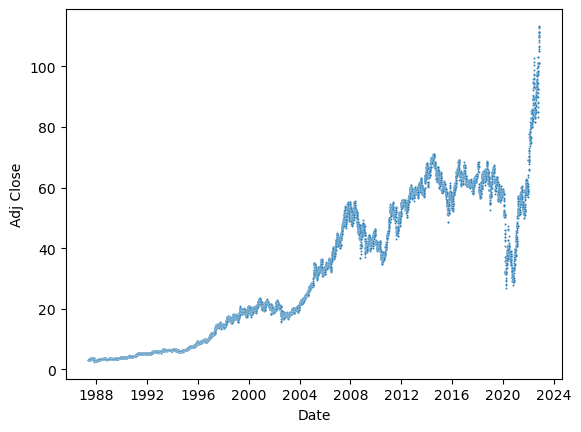

In [212]:
# exxon data with imputed values
sns.scatterplot(data=exxon_stock, x='Date', y='Adj Close', s = 2);

***Lockheed Martin Stock data cleaning***

In [214]:
lockheed_stock = pd.read_csv('LockheedMartinStock.csv')
lockheed_stock = lockheed_stock[['Date', 'Adj Close']]
lockheed_stock['Date'] = pd.to_datetime(lockheed_stock['Date'])

some graphs to check for irregularities

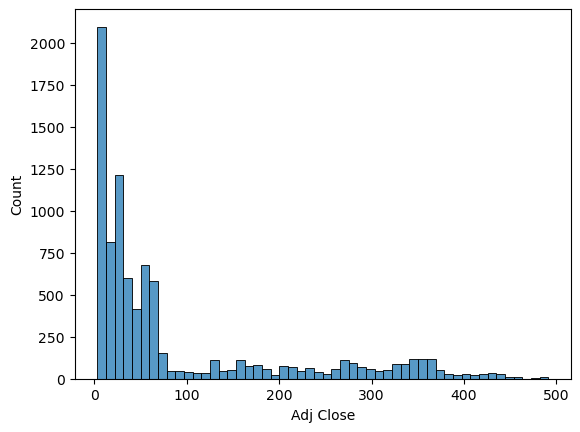

In [215]:
sns.histplot(lockheed_stock['Adj Close']);

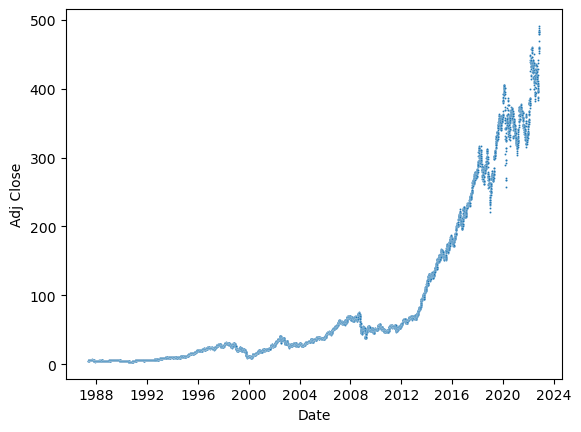

In [216]:
sns.scatterplot(data=lockheed_stock, x='Date', y='Adj Close', s = 2);

In [217]:
per = lockheed_stock.Date.dt.to_period("M")
g = lockheed_stock.groupby(per)
medians = g.agg({'Adj Close':np.median}).reset_index()
medians

,Date,Adj Close
0,1987-05,5.260655
1,1987-06,5.953974
2,1987-07,6.389979
3,1987-08,6.447166
4,1987-09,6.329650
...,...,...
422,2022-07,398.057160
423,2022-08,424.510712
424,2022-09,414.048096
425,2022-10,408.512634


In [218]:
missing = pd.date_range(start = '1987-05-20', end = '2022-11-14' ).difference(lockheed_stock['Date'])
missing

DatetimeIndex(['1987-05-23', '1987-05-24', '1987-05-25', '1987-05-30',
               '1987-05-31', '1987-06-06', '1987-06-07', '1987-06-13',
               '1987-06-14', '1987-06-20',
               ...
               '2022-10-15', '2022-10-16', '2022-10-22', '2022-10-23',
               '2022-10-29', '2022-10-30', '2022-11-05', '2022-11-06',
               '2022-11-12', '2022-11-13'],
              dtype='datetime64[ns]', length=4018, freq=None)

In [219]:
filled = pd.DataFrame({"Date": np.array([]), "Adj Close": np.array([])})
for date in missing:
    entry = medians[medians['Date']==date.strftime('%Y-%m')]
    if (len(entry) != 0):
        filled.loc[len(filled.index)] = np.array([date, entry['Adj Close'].iloc[0]])
    else:
        # TODO: implement linear function imputation methodology if a(n) specific month has no data
filled

,Date,Adj Close
0,1987-05-23,5.260655
1,1987-05-24,5.260655
2,1987-05-25,5.260655
3,1987-05-30,5.260655
4,1987-05-31,5.260655
...,...,...
4013,2022-10-30,408.512634
4014,2022-11-05,481.9944
4015,2022-11-06,481.9944
4016,2022-11-12,481.9944


In [220]:
lockheed_stock = lockheed_stock.append(filled)

/var/folders/_9/4y2qsq2s4z7409lj_26z3c6w0000gn/T/ipykernel_39771/1309813060.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lockheed_stock = lockheed_stock.append(filled)


In [245]:
lockheed_stock = lockheed_stock.sort_values('Date')
lockheed_stock = lockheed_stock.reset_index()[['Date', 'Adj Close']]
lockheed_stock

,Date,Adj Close
0,1987-05-20,5.06052
1,1987-05-21,5.017636
2,1987-05-22,5.017636
3,1987-05-23,5.260655
4,1987-05-24,5.260655
...,...,...
12958,2022-11-10,487.728638
12959,2022-11-11,460.985413
12960,2022-11-12,481.9944
12961,2022-11-13,481.9944


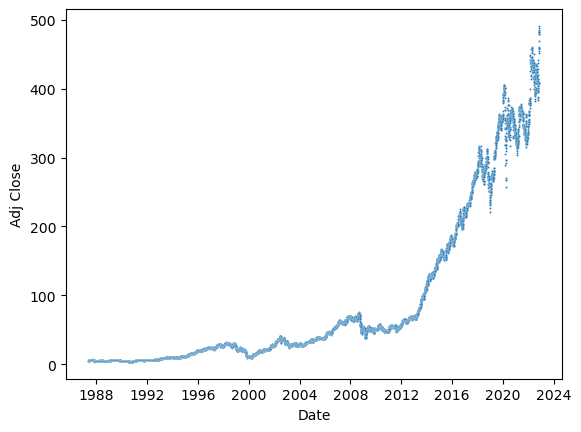

In [222]:
# lockheed data with imputed values
sns.scatterplot(data=lockheed_stock, x='Date', y='Adj Close', s = 2);

***McDonald's Stock Data cleaning***

In [223]:
mcd_stock = pd.read_csv('McDonaldStock.csv')
mcd_stock = mcd_stock[['Date', 'Adj Close']]
mcd_stock['Date'] = pd.to_datetime(mcd_stock['Date'])

some graphs to check for irregularities

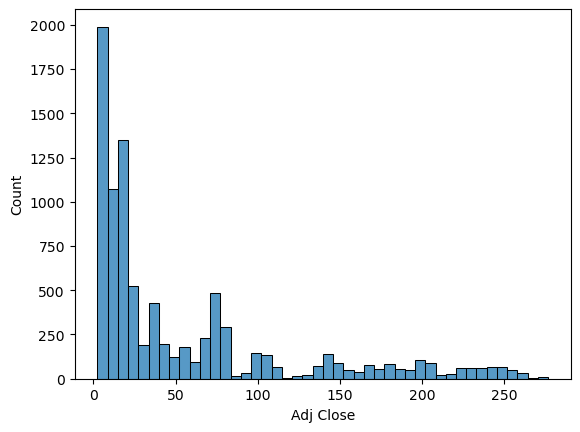

In [224]:
sns.histplot(mcd_stock['Adj Close']);

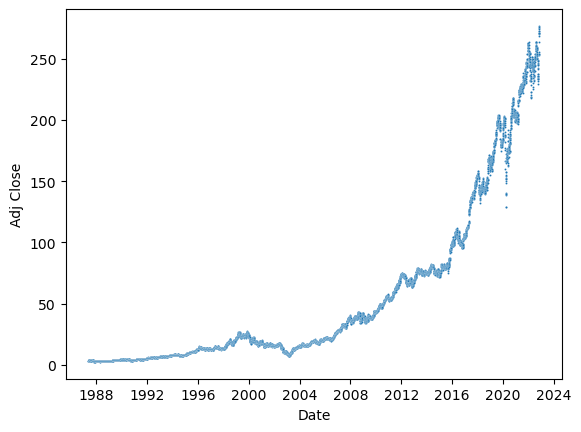

In [225]:
sns.scatterplot(data=mcd_stock, x='Date', y='Adj Close', s = 2);

In [226]:
per = mcd_stock.Date.dt.to_period("M")
g = mcd_stock.groupby(per)
medians = g.agg({'Adj Close':np.median}).reset_index()
medians

,Date,Adj Close
0,1987-05,3.362026
1,1987-06,3.547471
2,1987-07,3.422063
3,1987-08,3.787274
4,1987-09,3.538532
...,...,...
422,2022-07,250.470626
423,2022-08,258.174805
424,2022-09,252.965317
425,2022-10,245.368103


In [228]:
missing = pd.date_range(start = '1987-05-20', end = '2022-11-14' ).difference(mcd_stock['Date'])
missing

DatetimeIndex(['1987-05-23', '1987-05-24', '1987-05-25', '1987-05-30',
               '1987-05-31', '1987-06-06', '1987-06-07', '1987-06-13',
               '1987-06-14', '1987-06-20',
               ...
               '2022-10-15', '2022-10-16', '2022-10-22', '2022-10-23',
               '2022-10-29', '2022-10-30', '2022-11-05', '2022-11-06',
               '2022-11-12', '2022-11-13'],
              dtype='datetime64[ns]', length=4018, freq=None)

In [229]:
filled = pd.DataFrame({"Date": np.array([]), "Adj Close": np.array([])})
for date in missing:
    entry = medians[medians['Date']==date.strftime('%Y-%m')]
    if (len(entry) != 0):
        filled.loc[len(filled.index)] = np.array([date, entry['Adj Close'].iloc[0]])
    else:
        # TODO: implement linear function imputation methodology if a(n) specific month has no data
filled

,Date,Adj Close
0,1987-05-23,3.362026
1,1987-05-24,3.362026
2,1987-05-25,3.362026
3,1987-05-30,3.362026
4,1987-05-31,3.362026
...,...,...
4013,2022-10-30,245.368103
4014,2022-11-05,272.251694
4015,2022-11-06,272.251694
4016,2022-11-12,272.251694


In [230]:
mcd_stock = mcd_stock.append(filled)

/var/folders/_9/4y2qsq2s4z7409lj_26z3c6w0000gn/T/ipykernel_39771/2470576161.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mcd_stock = mcd_stock.append(filled)


In [244]:
mcd_stock = mcd_stock.sort_values('Date')
mcd_stock = mcd_stock.reset_index()[['Date', 'Adj Close']]
mcd_stock

,Date,Adj Close
0,1987-05-20,3.212602
1,1987-05-21,3.255296
2,1987-05-22,3.356691
3,1987-05-23,3.362026
4,1987-05-24,3.362026
...,...,...
12958,2022-11-10,274.334961
12959,2022-11-11,269.870117
12960,2022-11-12,272.251694
12961,2022-11-13,272.251694


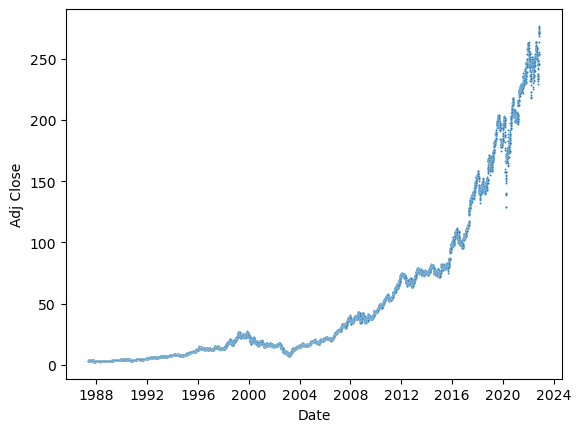

In [233]:
# McDonald's data with imputed values
sns.scatterplot(data=mcd_stock, x='Date', y='Adj Close', s = 2);

### Generate final dataframe and convert to csv

In [243]:
brent_oil_prices['Price'].reset_index()
#mcd_stock['Adj Close'], brent_oil_prices['Price']

,index,Price
0,0,18.63
1,1,18.45
2,2,18.55
3,0,18.6
4,1,18.6
...,...,...
12958,9008,94.25
12959,9009,96.37
12960,3950,95.68
12961,3951,95.68


In [294]:
df = pd.DataFrame({})
df['Date'] = brent_oil_prices['Date']
df['Oil_Price'] = brent_oil_prices['Price']
df['McDonald_Stock'] = mcd_stock['Adj Close']
df['Lockheed_Stock'] = lockheed_stock['Adj Close']
df['Exxon_Stock'] = exxon_stock['Adj Close']
df

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock
0,1987-05-20,18.63,3.212602,5.06052,3.196271
1,1987-05-21,18.45,3.255296,5.017636,3.191697
2,1987-05-22,18.55,3.356691,5.017636,3.173407
3,1987-05-23,18.6,3.362026,5.260655,3.196271
4,1987-05-24,18.6,3.362026,5.260655,3.196271
...,...,...,...,...,...
12958,2022-11-10,94.25,274.334961,487.728638,70.811172
12959,2022-11-11,96.37,269.870117,460.985413,69.52903
12960,2022-11-12,95.68,272.251694,481.9944,69.52903
12961,2022-11-13,95.68,272.251694,481.9944,69.52903


In [260]:
df.to_csv(r'Users\ayushnigade\Documents\Brent Oil Prediction\data.csv')

### OLS

In [302]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

dummy-encode the months:

In [295]:
df['Month'] = df['Date'].dt.strftime("%b")
#pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
df = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month', drop_first=True)],axis=1)

# now drop the original 'Month' column (you don't need it anymore)
df.drop(['Month'],axis=1, inplace=True)
df

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1987-05-20,18.63,3.212602,5.06052,3.196271,0,0,0,0,0,0,0,1,0,0,0
1,1987-05-21,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,0,0,1,0,0,0
2,1987-05-22,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,0,0,1,0,0,0
3,1987-05-23,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,0,0,1,0,0,0
4,1987-05-24,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,2022-11-10,94.25,274.334961,487.728638,70.811172,0,0,0,0,0,0,0,0,1,0,0
12959,2022-11-11,96.37,269.870117,460.985413,69.52903,0,0,0,0,0,0,0,0,1,0,0
12960,2022-11-12,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,0,0,0,1,0,0
12961,2022-11-13,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,0,0,0,1,0,0


dummy-encode the days of the week:

In [296]:
df['Day of Week'] = df['Date'].dt.strftime("%a")
df = pd.concat([df,pd.get_dummies(df['Day of Week'], prefix='Day', drop_first=True)],axis=1)

# now drop the original 'Month' column (you don't need it anymore)
df.drop(['Day of Week'],axis=1, inplace=True)
df

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Month_May,Month_Nov,Month_Oct,Month_Sep,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,1987-05-20,18.63,3.212602,5.06052,3.196271,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1987-05-21,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1987-05-22,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1987-05-23,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1987-05-24,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,2022-11-10,94.25,274.334961,487.728638,70.811172,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
12959,2022-11-11,96.37,269.870117,460.985413,69.52903,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12960,2022-11-12,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
12961,2022-11-13,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [276]:
# make sure we have the right columns
df.columns

Index(['Date', 'Oil Price', 'McDonald Stock', 'Lockheed Stock', 'Exxon Stock',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'Day_Mon', 'Day_Sat', 'Day_Sun', 'Day_Thu', 'Day_Tue',
       'Day_Wed'],
      dtype='object')

In [298]:
df["Oil_Price_Yesterday"] = df['Oil_Price'].shift(1)
df.loc[0, "Oil_Price_Yesterday"] = 18.6
df

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Month_Nov,Month_Oct,Month_Sep,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Oil_Price_Yesterday
0,1987-05-20,18.63,3.212602,5.06052,3.196271,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,18.6
1,1987-05-21,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18.63
2,1987-05-22,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.45
3,1987-05-23,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,18.55
4,1987-05-24,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,2022-11-10,94.25,274.334961,487.728638,70.811172,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,93.05
12959,2022-11-11,96.37,269.870117,460.985413,69.52903,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,94.25
12960,2022-11-12,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,96.37
12961,2022-11-13,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,95.68


In [308]:
# 10370 rows for train, 2593 for test
#train, test = train_test_split(df, test_size=0.2)
train = df.iloc[:10370]
train_wo_date = train.loc[:, ~train.columns.isin(['Date'])].apply(pd.to_numeric, errors='ignore')
test = df.iloc[10370:]
test_wo_date = test.loc[:, ~test.columns.isin(['Date'])].apply(pd.to_numeric, errors='ignore')

X_train = train.loc[:, ~train.columns.isin(['Date', 'Oil_Price'])]
y_train = train[['Oil_Price']]

X_test = test.loc[:, ~test.columns.isin(['Date', 'Oil_Price'])]
y_test = test[['Oil_Price']]
train

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Month_Nov,Month_Oct,Month_Sep,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Oil_Price_Yesterday
0,1987-05-20,18.63,3.212602,5.06052,3.196271,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,18.6
1,1987-05-21,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18.63
2,1987-05-22,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.45
3,1987-05-23,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,18.55
4,1987-05-24,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10365,2015-10-05,49.45,84.34407,174.602646,46.400202,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,47.935
10366,2015-10-06,51.34,84.95266,173.50592,46.400202,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,49.45
10367,2015-10-07,51.66,84.844261,175.608688,46.400202,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,51.34
10368,2015-10-08,52.13,85.828018,176.779739,45.287163,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,51.66


In [309]:
ar1 = smf.ols(formula='Oil_Price ~ McDonald_Stock + Lockheed_Stock + Exxon_Stock + Month_Aug + Month_Dec + Month_Feb + Month_Jan + Month_Jul + Month_Jun + Month_Mar + Month_May + Month_Nov + Month_Oct + Month_Sep + Day_Mon + Day_Sat + Day_Sun + Day_Thu + Day_Tue + Day_Wed + Oil_Price_Yesterday', data=train_wo_date).fit()
print(ar1.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.047e+05
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:31:51   Log-Likelihood:                -18089.
No. Observations:               10370   AIC:                         3.622e+04
Df Residuals:                   10348   BIC:                         3.638e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0752    

#### will attempt AR2

In [311]:
df["Oil_Price_2_Days_Ago"] = df['Oil_Price'].shift(2)
df.loc[0, "Oil_Price_2_Days_Ago"] = 18.6
df.loc[1, "Oil_Price_2_Days_Ago"] = 18.6
df

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Month_Oct,Month_Sep,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Oil_Price_Yesterday,Oil_Price_2_Days_Ago
0,1987-05-20,18.63,3.212602,5.06052,3.196271,0,0,0,0,0,...,0,0,0,0,0,0,0,1,18.6,18.6
1,1987-05-21,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,...,0,0,0,0,0,1,0,0,18.63,18.6
2,1987-05-22,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18.45,18.63
3,1987-05-23,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,1,0,0,0,0,18.55,18.45
4,1987-05-24,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,1,0,0,0,18.6,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,2022-11-10,94.25,274.334961,487.728638,70.811172,0,0,0,0,0,...,0,0,0,0,0,1,0,0,93.05,96.85
12959,2022-11-11,96.37,269.870117,460.985413,69.52903,0,0,0,0,0,...,0,0,0,0,0,0,0,0,94.25,93.05
12960,2022-11-12,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,...,0,0,0,1,0,0,0,0,96.37,94.25
12961,2022-11-13,95.68,272.251694,481.9944,69.52903,0,0,0,0,0,...,0,0,0,0,1,0,0,0,95.68,96.37


In [312]:
# 10370 rows for train, 2593 for test
#train, test = train_test_split(df, test_size=0.2)
train = df.iloc[:10371]
train_wo_date = train.loc[:, ~train.columns.isin(['Date'])].apply(pd.to_numeric, errors='ignore')
test = df.iloc[10371:]
test_wo_date = test.loc[:, ~test.columns.isin(['Date'])].apply(pd.to_numeric, errors='ignore')

X_train = train.loc[:, ~train.columns.isin(['Date', 'Oil_Price'])]
y_train = train[['Oil_Price']]

X_test = test.loc[:, ~test.columns.isin(['Date', 'Oil_Price'])]
y_test = test[['Oil_Price']]
train

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Month_Oct,Month_Sep,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Oil_Price_Yesterday,Oil_Price_2_Days_Ago
0,1987-05-20,18.63,3.212602,5.06052,3.196271,0,0,0,0,0,...,0,0,0,0,0,0,0,1,18.6,18.6
1,1987-05-21,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,...,0,0,0,0,0,1,0,0,18.63,18.6
2,1987-05-22,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18.45,18.63
3,1987-05-23,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,1,0,0,0,0,18.55,18.45
4,1987-05-24,18.6,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,1,0,0,0,18.6,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10366,2015-10-06,51.34,84.95266,173.50592,46.400202,0,0,0,0,0,...,1,0,0,0,0,0,1,0,49.45,47.935
10367,2015-10-07,51.66,84.844261,175.608688,46.400202,0,0,0,0,0,...,1,0,0,0,0,0,0,1,51.34,49.45
10368,2015-10-08,52.13,85.828018,176.779739,45.287163,0,0,0,0,0,...,1,0,0,0,0,1,0,0,51.66,51.34
10369,2015-10-09,52.08,85.66964,175.864349,47.050232,0,0,0,0,0,...,1,0,0,0,0,0,0,0,52.13,51.66


In [313]:
ar2 = smf.ols(formula='Oil_Price ~ McDonald_Stock + Lockheed_Stock + Exxon_Stock + Month_Aug + Month_Dec + Month_Feb + Month_Jan + Month_Jul + Month_Jun + Month_Mar + Month_May + Month_Nov + Month_Oct + Month_Sep + Day_Mon + Day_Sat + Day_Sun + Day_Thu + Day_Tue + Day_Wed + Oil_Price_Yesterday + Oil_Price_2_Days_Ago', data=train_wo_date).fit()
print(ar2.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.951e+05
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:38:25   Log-Likelihood:                -18015.
No. Observations:               10371   AIC:                         3.608e+04
Df Residuals:                   10348   BIC:                         3.624e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0871 

### Explanation
The $R^2$ did not increase for the training set. So there is minimal value in having a AR2 model, AR3, AR4, etc model. As such, we shall stick with an AR1 model.

In [314]:
df = df.loc[:, ~train.columns.isin(['Oil_Price_2_Days_Ago'])]

In [322]:
df = df.apply(pd.to_numeric, errors='ignore')

In [323]:
df

,Date,Oil_Price,McDonald_Stock,Lockheed_Stock,Exxon_Stock,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Month_Nov,Month_Oct,Month_Sep,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Oil_Price_Yesterday
0,548467200000000000,18.63,3.212602,5.060520,3.196271,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,18.60
1,548553600000000000,18.45,3.255296,5.017636,3.191697,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18.63
2,548640000000000000,18.55,3.356691,5.017636,3.173407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.45
3,548726400000000000,18.60,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,18.55
4,548812800000000000,18.60,3.362026,5.260655,3.196271,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,18.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,1668038400000000000,94.25,274.334961,487.728638,70.811172,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,93.05
12959,1668124800000000000,96.37,269.870117,460.985413,69.529030,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,94.25
12960,1668211200000000000,95.68,272.251694,481.994400,69.529030,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,96.37
12961,1668297600000000000,95.68,272.251694,481.994400,69.529030,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,95.68


In [409]:
# 10370 rows for train, 2593 for test
#train, test = train_test_split(df, test_size=0.2)
train = df.iloc[:10370].apply(pd.to_numeric, errors='ignore')
train_wo_date = train.loc[:, ~train.columns.isin(['Date'])]
test = df.iloc[10370:].apply(pd.to_numeric, errors='ignore')
test_wo_date = test.loc[:, ~test.columns.isin(['Date'])]

X_train = train.loc[:, ~train.columns.isin(['Date', 'Oil_Price'])]
y_train = train['Oil_Price']

X_test = test.loc[:, ~test.columns.isin(['Date', 'Oil_Price'])]
y_test = test['Oil_Price']

In [410]:
ar1 = smf.ols(formula='Oil_Price ~ Exxon_Stock + Day_Thu + Oil_Price_Yesterday', data=train_wo_date).fit()
print(ar1.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.133e+06
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:38:32   Log-Likelihood:                -18096.
No. Observations:               10370   AIC:                         3.620e+04
Df Residuals:                   10366   BIC:                         3.623e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0186    

In [411]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = np.array(['Exxon_Stock', 'Day_Thu','Oil_Price_Yesterday'])
VIF(train, cols)

Exxon_Stock            3.086825
Day_Thu                1.000002
Oil_Price_Yesterday    3.086825
dtype: float64

In [412]:
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [413]:
OSR2(ar1, train, test, "Oil_Price")

0.9939841322572638

In [414]:
def plot_last_fifty(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.scatter(x[-50:], y[-50:], linewidth=3, color='black')
    plt.plot(x[-50:], y[-50:], linewidth=3, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x[-50:], value[-50:], linewidth=3, color=key)
        
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Dogecoin_High', fontsize=16)
    plt.title("Last 50 Days of Test Set (Blue is Predictions)")
    plt.show()

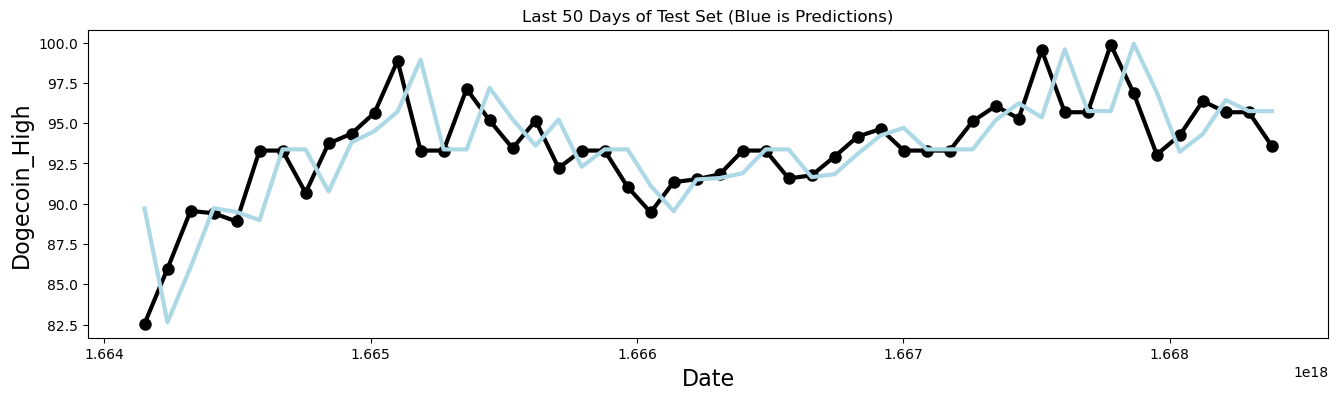

In [428]:
x = test['Date']
y = y_test.to_numpy()
y_pred = ar1.predict(X_test)
plot_last_fifty(x, y, lightblue=y_pred)

## Gradient Boosting Model

In [416]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

In [417]:
kf = KFold(n_splits=5,shuffle=True, random_state=88)
kfold_index = [] 
for index in kf.split(X_train):
    kfold_index.append(index)

In [418]:
# Define the grid (## I am using a subset of the original grid, to reduce the running time)
n_estimators = np.linspace(500, 75*500, 75, dtype='int32')
max_leaf_nodes = np.linspace(2, 10, 9, dtype='int32')  
max_leaf_nodes

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [419]:
# Initialize the output array
R2_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
R2_array[:]=np.nan
RMSE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
RMSE_array[:]=np.nan
MAE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
MAE_array[:]=np.nan
print(R2_array.shape)

(75, 9)


In [420]:
start = time.time()
for itr in range(len(max_leaf_nodes)):
    depth = max_leaf_nodes[itr]
    print('iter % s, max_depth: %s' % (itr, depth))
    #------begin the 5-fold cross validation ------
    R2_array_cv = np.zeros([len(n_estimators),5])
    R2_array_cv[:]=np.nan
    RMSE_array_cv = np.zeros([len(n_estimators),5])
    RMSE_array_cv[:]=np.nan
    MAE_array_cv = np.zeros([len(n_estimators),5])
    MAE_array_cv[:]=np.nan
    for i in range(5):
        train_idx, val_idx = kfold_index[i]
        X_train_cv = X_train.iloc[train_idx]
        y_train_cv = y_train.iloc[train_idx]
        X_val_cv = X_train.iloc[val_idx]
        y_val_cv = y_train.iloc[val_idx]
        print('   fold-%s, training set size %s, validation set size %s' %(i, len(train_idx), len(val_idx)))
        #------ Given each training set and validation set, train a gbr model with the maximum n_estimators
        gbr2 = GradientBoostingRegressor(n_estimators = n_estimators[-1], learning_rate = 0.005, max_depth = 20,
                                         max_leaf_nodes=depth, min_samples_leaf=10,random_state=99,verbose=0)
        gbr2.fit(X_train_cv,y_train_cv)
        j=0
        idx=[]
        r2_lst=[]
        rmse_lst=[]
        mae_lst=[]
        for y_staged_pred in gbr2.staged_predict(X_val_cv): #gbr staged_predict: predict the result based on the subtree
            r2= pearsonr(y_staged_pred, y_val_cv)[0] ** 2
            rmse = mean_squared_error(y_val_cv, y_staged_pred, squared=False)
            mae = mean_absolute_error(y_val_cv, y_staged_pred)
            if j % 500 == 0:
                idx.append(j)
                r2_lst.append(r2)
                rmse_lst.append(rmse)
                mae_lst.append(mae)
            j+=1
        R2_array_cv[:,i]=r2_lst
        RMSE_array_cv[:,i]=rmse_lst
        MAE_array_cv[:,i]=mae_lst
        print('        cv fold-%s, time-ellapsed: %.2f' %(i,time.time()-start))
    R2_array[:,itr]=np.average(R2_array_cv,axis = 1)
    RMSE_array[:,itr]=np.average(RMSE_array_cv,axis = 1)
    MAE_array[:,itr]=np.average(MAE_array_cv,axis = 1)

iter 0, max_depth: 2
   fold-0, training set size 8296, validation set size 2074
        cv fold-0, time-ellapsed: 200.77
   fold-1, training set size 8296, validation set size 2074
        cv fold-1, time-ellapsed: 401.80
   fold-2, training set size 8296, validation set size 2074
        cv fold-2, time-ellapsed: 608.64
   fold-3, training set size 8296, validation set size 2074
        cv fold-3, time-ellapsed: 818.37
   fold-4, training set size 8296, validation set size 2074
        cv fold-4, time-ellapsed: 1020.24
iter 1, max_depth: 3
   fold-0, training set size 8296, validation set size 2074
        cv fold-0, time-ellapsed: 1251.94
   fold-1, training set size 8296, validation set size 2074
        cv fold-1, time-ellapsed: 1505.74
   fold-2, training set size 8296, validation set size 2074
        cv fold-2, time-ellapsed: 1748.88
   fold-3, training set size 8296, validation set size 2074
        cv fold-3, time-ellapsed: 1996.75
   fold-4, training set size 8296, validatio

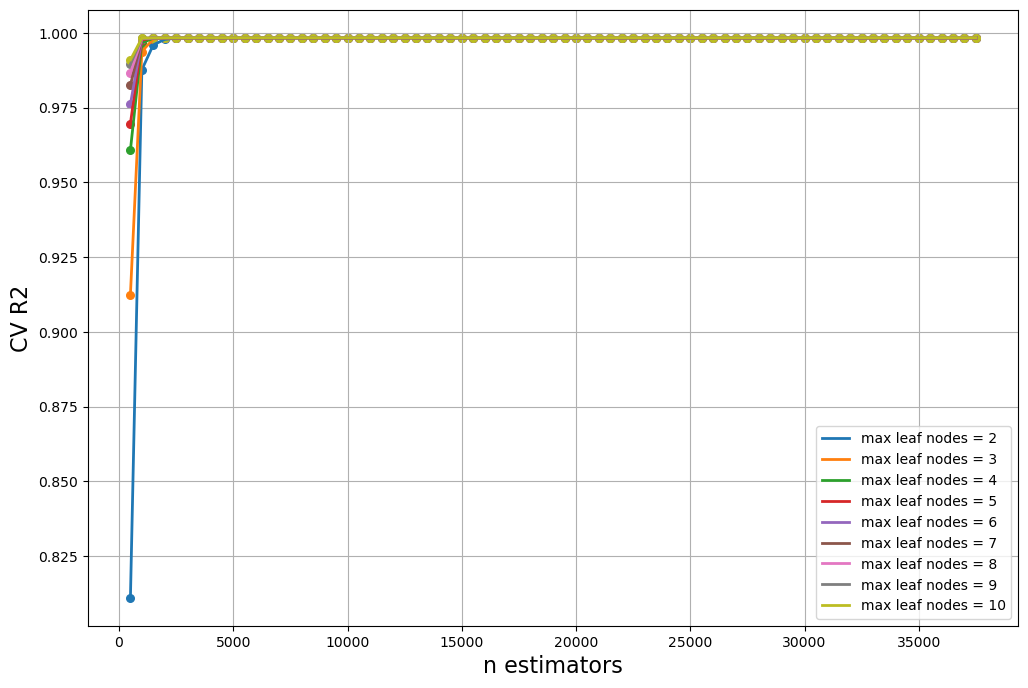

In [421]:
plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(max_leaf_nodes)
M = len(n_estimators)
for i in range(N):
    plt.scatter(n_estimators, R2_array[:,i], s=30)
    plt.plot(n_estimators, R2_array[:,i], linewidth=2,
             label='max leaf nodes = '+str(max_leaf_nodes[i]))
plt.legend(loc='lower right')
plt.show()

In [422]:
best_model_index = np.argmax(R2_array)
row_index = best_model_index//R2_array.shape[1]
col_index = best_model_index % R2_array.shape[1]
best_n_estimators = n_estimators[row_index]
best_max_leaf_nodes = max_leaf_nodes[col_index]
print('Best Model: n_estimator = %s, max_leaf_nodes = %s' %(best_n_estimators, best_max_leaf_nodes))

Best Model: n_estimator = 6500, max_leaf_nodes = 10


In [423]:
gbr_cv = GradientBoostingRegressor(n_estimators = best_n_estimators, learning_rate = 0.005, max_depth = 20,
                                max_leaf_nodes=best_max_leaf_nodes, min_samples_leaf=10,random_state=99,verbose=0)
gbr_cv.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.005, max_depth=20, max_leaf_nodes=10,
                          min_samples_leaf=10, n_estimators=6500,
                          random_state=99)

In [425]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    #print(y_pred)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    #print(SST)           
    return (1 - SSE/SST)

In [426]:
print('Cross-validated R2:', round(R2_array[row_index, col_index], 5))
print('OSR2:', round(OSR2(gbr_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.99839
OSR2: 0.98927


In [427]:
display(pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*gbr_cv.feature_importances_}).round(1))

,Feature,Importance score
0,McDonald_Stock,0.0
1,Lockheed_Stock,0.0
2,Exxon_Stock,0.0
3,Month_Aug,0.0
4,Month_Dec,0.0
5,Month_Feb,0.0
6,Month_Jan,0.0
7,Month_Jul,0.0
8,Month_Jun,0.0
9,Month_Mar,0.0


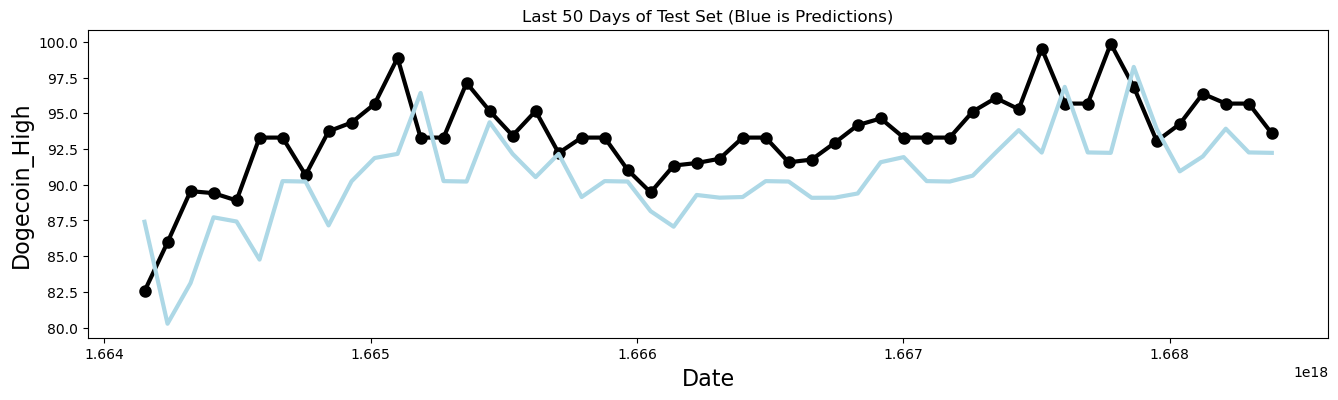

In [431]:
x = test['Date']
y = y_test.to_numpy()
y_pred = gbr_cv.predict(X_test)
plot_last_fifty(x, y, lightblue=y_pred)

### Random Forest Model

In [433]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [434]:
grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=2, min_samples_leaf=5, n_e

(1.0, 19.0)

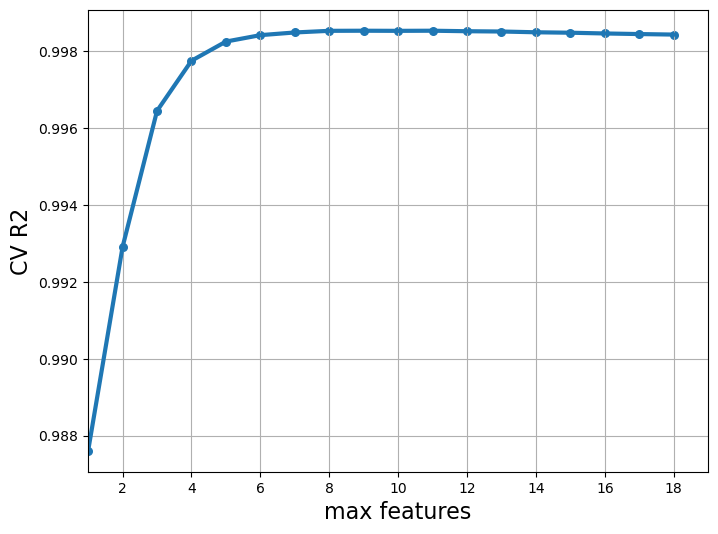

In [442]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])

In [436]:
print(rf_cv.best_params_)

{'max_features': 11, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [437]:
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.99852
OSR2: 0.95792


In [439]:
pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,McDonald_Stock,11.7
1,Lockheed_Stock,24.1
2,Exxon_Stock,7.4
3,Month_Aug,0.0
4,Month_Dec,0.0
5,Month_Feb,0.0
6,Month_Jan,0.0
7,Month_Jul,0.0
8,Month_Jun,0.0
9,Month_Mar,0.0


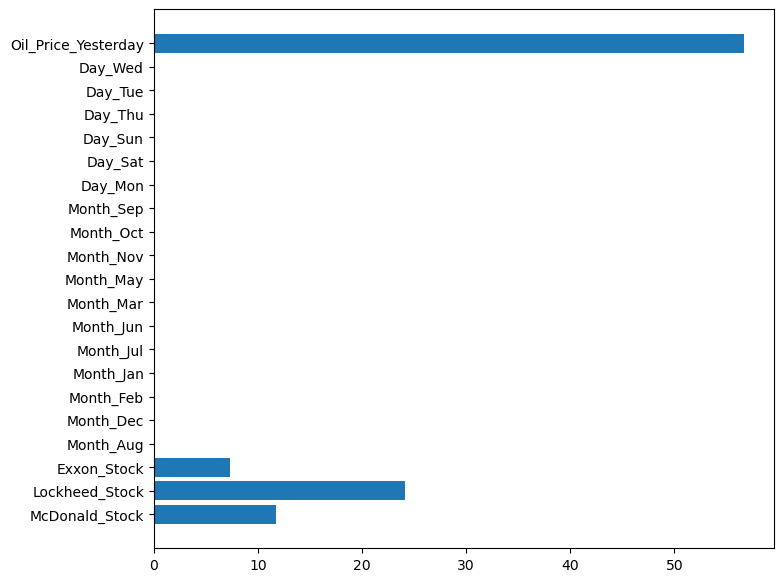

In [440]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

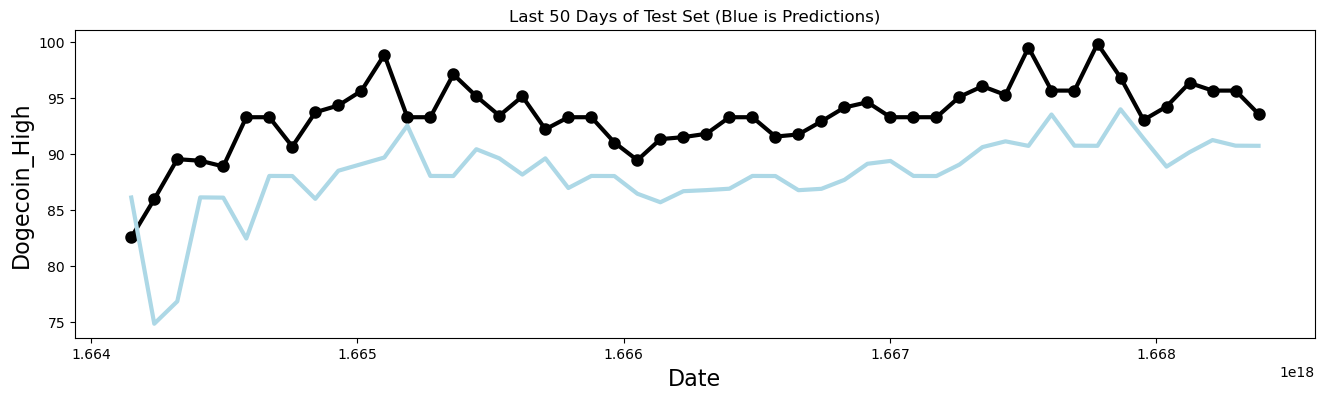

In [441]:
x = test['Date']
y = y_test.to_numpy()
y_pred = rf_cv.predict(X_test)
plot_last_fifty(x, y, lightblue=y_pred)